# 5 Flower Types Classification Dataset
kaggle - https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import os
import pathlib 
current_dir = os.path.abspath(os.getcwd())

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
path = pathlib.Path(current_dir + '\\flower_images')

lilly = list(path.glob('Lilly/*'))[:-1]
lotus = list(path.glob('Lotus/*'))[:-1]
orchid = list(path.glob('Orchid/*'))[:-1]
sunflower = list(path.glob('Sunflower/*'))[:-1]
tulip = list(path.glob('Tulip/*'))[:-1]

In [5]:
data = {
    'lilly' : lilly,
    'lotus' : lotus,
    'orchid' : orchid,
    'sunflower' : sunflower,
    'tulip' : tulip
}
flower_labels = {k:v for k, v in enumerate(data.keys())}

flower_labels

{0: 'lilly', 1: 'lotus', 2: 'orchid', 3: 'sunflower', 4: 'tulip'}

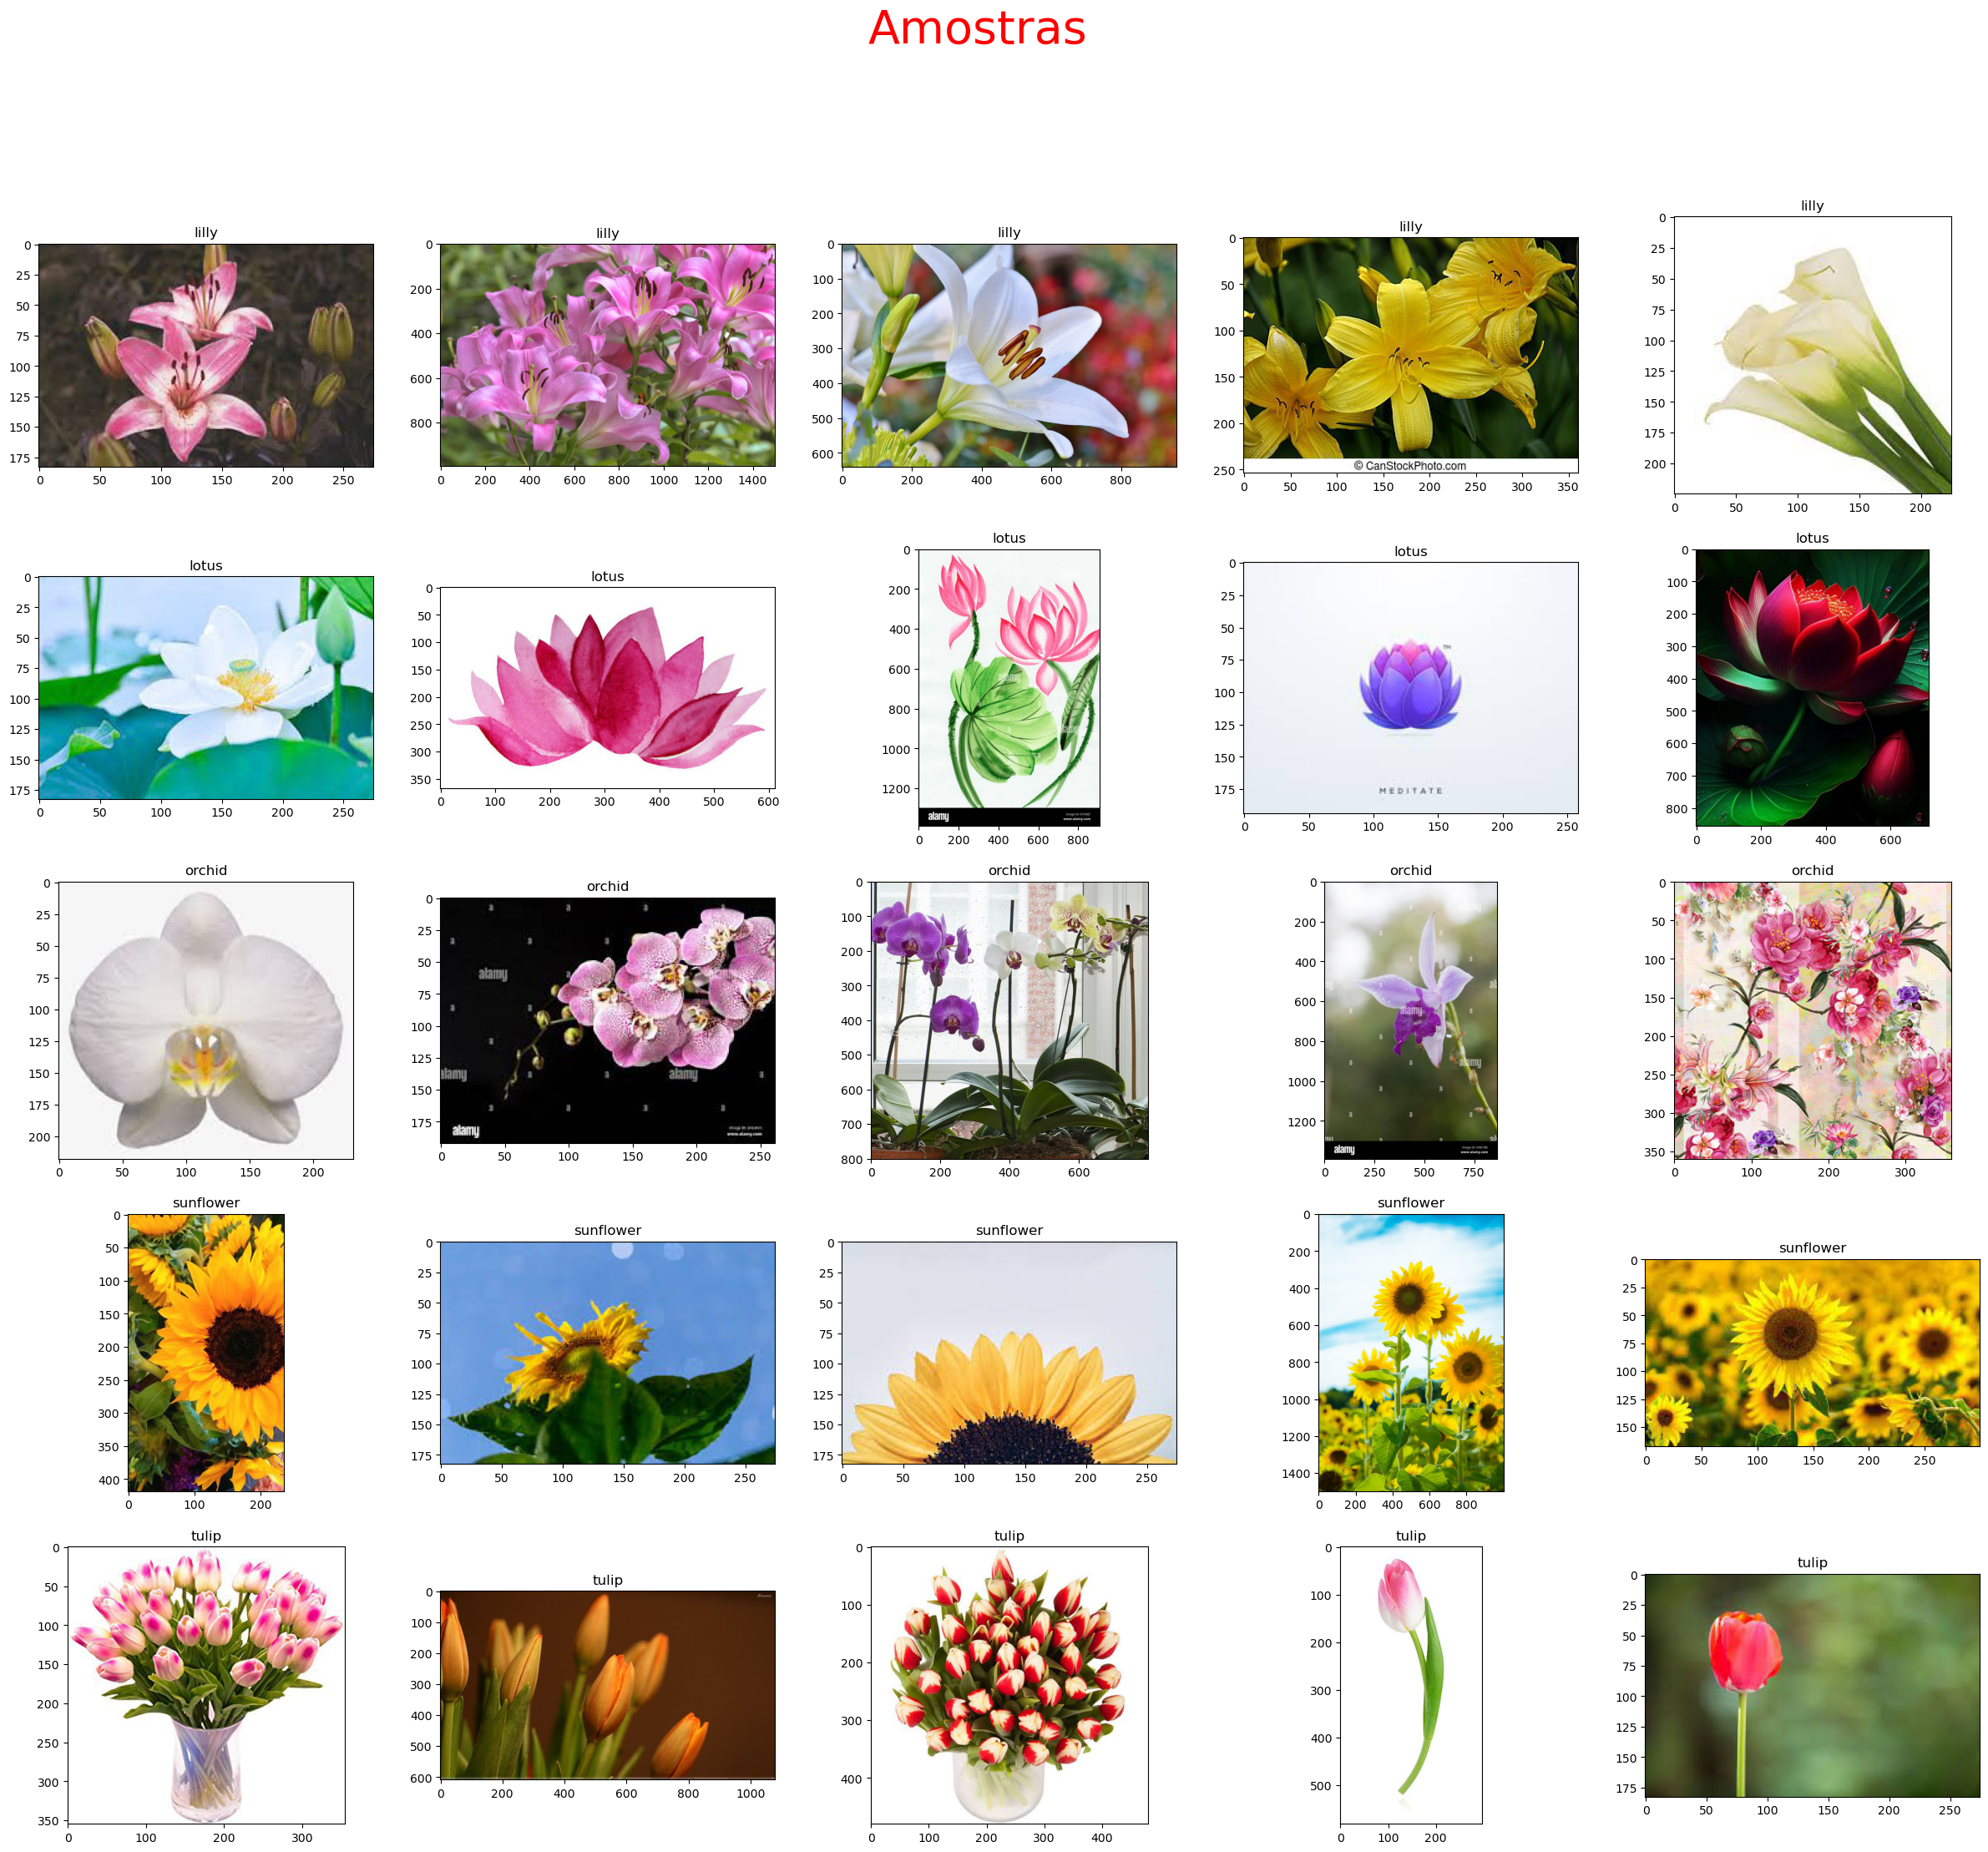

In [6]:
fig, ax = plt.subplots(5, 5, figsize = (30,25))
fig.suptitle('Amostras', color='red', fontsize=40)

for i in range(5):
    for j in range(5):
        image = img.imread(data.get(flower_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(flower_labels.get(i))

In [7]:
X_train = []
Y_train = []
labels  = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
image_size = 180

for i in labels:
    folderPath = os.path.join(current_dir + '\\flower_images', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train.shape

(5000, 180, 180, 3)

In [8]:
X_train, Y_train = shuffle(X_train, Y_train)
X_train.shape

(5000, 180, 180, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(180, 180, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(5,activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(filepath = 'model_CNN_5flowers.keras', save_best_only = True)]

history = model.fit(X_train, y_train, epochs = 30, validation_split = 0.1, callbacks = callbacks)

Epoch 1/30
113/113 [==============================] - 142s 1s/step - loss: 7.0729 - accuracy: 0.4353 - val_loss: 4.2502 - val_accuracy: 0.3225
Epoch 2/30
113/113 [==============================] - 173s 2s/step - loss: 1.6349 - accuracy: 0.4881 - val_loss: 1.6810 - val_accuracy: 0.5275
Epoch 3/30
113/113 [==============================] - 160s 1s/step - loss: 1.1469 - accuracy: 0.5739 - val_loss: 1.0229 - val_accuracy: 0.6225
Epoch 4/30
113/113 [==============================] - 158s 1s/step - loss: 0.9982 - accuracy: 0.6094 - val_loss: 1.0164 - val_accuracy: 0.6125
Epoch 5/30
113/113 [==============================] - 153s 1s/step - loss: 0.9259 - accuracy: 0.6567 - val_loss: 1.0377 - val_accuracy: 0.6075
Epoch 6/30
113/113 [==============================] - 155s 1s/step - loss: 0.8701 - accuracy: 0.6803 - val_loss: 0.9199 - val_accuracy: 0.6800
Epoch 7/30
113/113 [==============================] - 140s 1s/step - loss: 0.7558 - accuracy: 0.7097 - val_loss: 0.9614 - val_accuracy: 0.6700

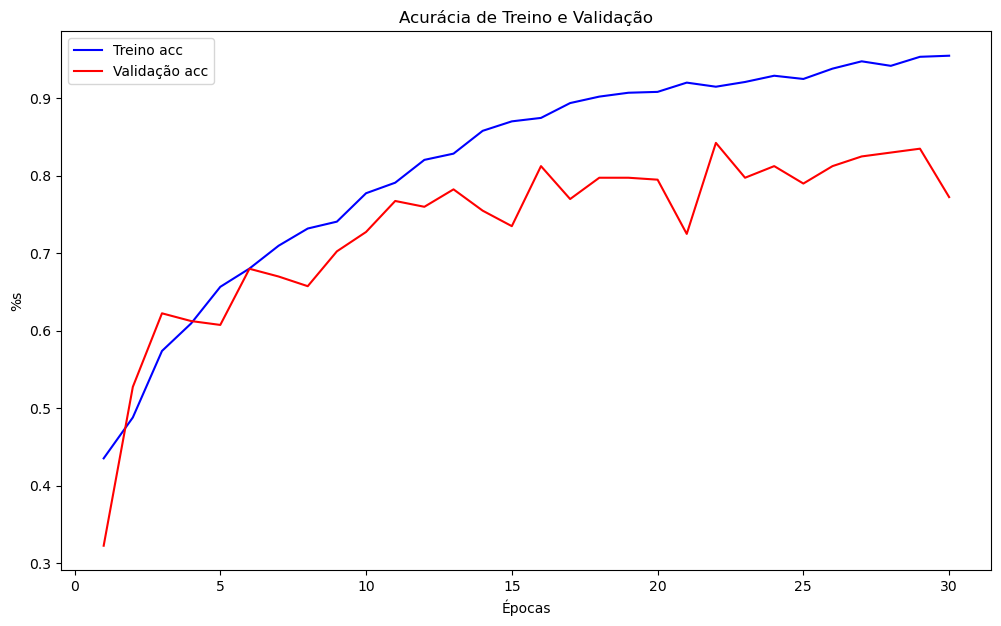

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, accuracy, 'b', label = 'Treino acc')
plt.plot(epochs, val_accuracy, 'r', label = 'Validação acc')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Acurácia de Treino e Validação')
plt.legend()
plt.show()

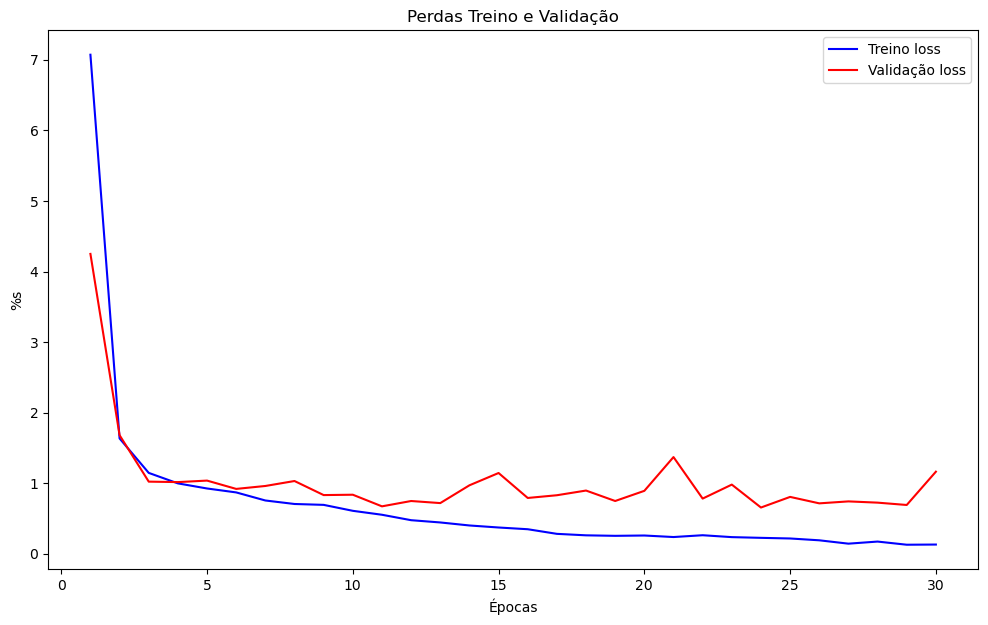

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'b', label = 'Treino loss')
plt.plot(epochs, val_loss, 'r', label = 'Validação loss')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Perdas Treino e Validação')
plt.legend()
plt.show()

In [15]:
from tensorflow import keras
model = keras.models.load_model('model_CNN_5flowers.keras')

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

32/32 [==============================] - 7s 223ms/step - loss: 0.6244 - accuracy: 0.8370
Test accuracy: 0.837
